In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("train1.csv",usecols = ['SalePrice','MSSubClass','MSZoning','LotFrontage','LotArea','Street','YearBuilt','LotShape','1stFlrSF','2ndFlrSF']).dropna()

In [3]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [4]:
data.shape

(1201, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
MSSubClass     1201 non-null int64
MSZoning       1201 non-null object
LotFrontage    1201 non-null float64
LotArea        1201 non-null int64
Street         1201 non-null object
LotShape       1201 non-null object
YearBuilt      1201 non-null int64
1stFlrSF       1201 non-null int64
2ndFlrSF       1201 non-null int64
SalePrice      1201 non-null int64
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


##### Pytorch --> Tabular

1. Categorical Features -- Embedding Layers
2. Continous 


1. Categorical Features--

a) Label Encoding

b) take all categorical features --- convert into numpy and then torch(tensors)

c) Lets take all the continous values

d) convert continous into numpy and then tensor

c) Embedding Layers(only for categorical features)

In [6]:
for i in data.columns:
    print("Column Name {} and unique value:{}".format(i,len(data[i].unique())))

Column Name MSSubClass and unique value:15
Column Name MSZoning and unique value:5
Column Name LotFrontage and unique value:110
Column Name LotArea and unique value:869
Column Name Street and unique value:2
Column Name LotShape and unique value:4
Column Name YearBuilt and unique value:112
Column Name 1stFlrSF and unique value:678
Column Name 2ndFlrSF and unique value:368
Column Name SalePrice and unique value:597


In [7]:
import datetime
today_year = datetime.datetime.now().year
today_year

2020

In [8]:
data['Total_years']= today_year-data['YearBuilt']

In [9]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total_years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,17
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,44
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,19
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,105
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,20


In [10]:
data.drop('YearBuilt',axis=1,inplace=True)

In [11]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total_years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,17
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,44
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,19
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,105
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,20


In [12]:
categorical_class = ['MSSubClass','MSZoning','Street','LotShape']
out_feature = 'SalePrice'

In [13]:
data['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85])

In [14]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder={}
for features in categorical_class:
    
    lbl_encoder[features] = LabelEncoder()
    data[features]=lbl_encoder[features].fit_transform(data[features])


In [15]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total_years
0,5,3,65.0,8450,1,3,856,854,208500,17
1,0,3,80.0,9600,1,3,1262,0,181500,44
2,5,3,68.0,11250,1,0,920,866,223500,19
3,6,3,60.0,9550,1,0,961,756,140000,105
4,5,3,84.0,14260,1,0,1145,1053,250000,20


In [16]:
import numpy as np
cat_features = np.stack([data['MSSubClass'],data['MSZoning'],data['Street'],data['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [17]:
# converting to tensor
import torch
cat_features=torch.tensor(cat_features,dtype = torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [18]:
#create continous variable

cont_features = []

for i in data.columns:
    if i in ['MSSubClass','MSZoning','Street','LotShape','SalePrice']:
        pass
    else:
        cont_features.append(i)

In [19]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total_years']

In [20]:
cont_value = np.stack ([data[i].values for i in cont_features],axis=1)
cont_value = torch.tensor(cont_value,dtype = torch.float32)
cont_value

tensor([[   65.,  8450.,   856.,   854.,    17.],
        [   80.,  9600.,  1262.,     0.,    44.],
        [   68., 11250.,   920.,   866.,    19.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    79.],
        [   68.,  9717.,  1078.,     0.,    70.],
        [   75.,  9937.,  1256.,     0.,    55.]])

In [21]:
y = torch.tensor(data['SalePrice'].values,dtype=torch.float32).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [22]:
cat_features.shape,cont_value.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

### Embeding size for categorical column

In [23]:
data['MSSubClass'].unique()

array([ 5,  0,  6,  4, 14,  3, 10, 11,  1,  8, 12,  7, 13,  2,  9])

In [24]:
cat_dims = [len(data[features].unique()) for features in ['MSSubClass','MSZoning','Street','LotShape']]
cat_dims

[15, 5, 2, 4]

In [25]:
### output dimension should be set based on input i.e. min(50,feature_dim/2) just a thumb rule from fastai blog

embedding_dim = [(x,min(50,(x+1)//2)) for x in cat_dims]
embedding_dim


[(15, 8), (5, 3), (2, 1), (4, 2)]

In [26]:
import torch
from torch import nn
from torch.nn import functional as F

In [27]:
embed_representation = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [28]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [29]:
cat_1 = cat_features[:4]
cat_1

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [30]:
pd.set_option('display.max_rows',500)

embed_value=[]
for i,e in enumerate(embed_representation):
    embed_value.append(e(cat_1[:,i]))

In [31]:
embed_value

[tensor([[-1.9814, -0.5713,  0.8799,  1.1903,  0.2759,  0.2627,  0.7341, -0.2121],
         [ 1.4605, -0.1467,  1.0732,  0.1677, -0.0200, -0.2191, -1.0024, -1.6029],
         [-1.9814, -0.5713,  0.8799,  1.1903,  0.2759,  0.2627,  0.7341, -0.2121],
         [-0.1172,  0.3314, -2.3255,  0.0274, -0.2469, -0.4478, -1.2908,  1.5653]],
        grad_fn=<EmbeddingBackward>), tensor([[1.2226, 1.3562, 0.6092],
         [1.2226, 1.3562, 0.6092],
         [1.2226, 1.3562, 0.6092],
         [1.2226, 1.3562, 0.6092]], grad_fn=<EmbeddingBackward>), tensor([[0.9612],
         [0.9612],
         [0.9612],
         [0.9612]], grad_fn=<EmbeddingBackward>), tensor([[-1.0268, -2.0485],
         [-1.0268, -2.0485],
         [ 0.0806, -0.5289],
         [ 0.0806, -0.5289]], grad_fn=<EmbeddingBackward>)]

#### We can clearly see that first column of every row is converted to 8 dim and 2nd to 3 and 3rd to 1 and 4th to 2

Now we must bring them to systematic order as it was

In [32]:
z = torch.cat(embed_value,axis=1)
z

tensor([[-1.9814, -0.5713,  0.8799,  1.1903,  0.2759,  0.2627,  0.7341, -0.2121,
          1.2226,  1.3562,  0.6092,  0.9612, -1.0268, -2.0485],
        [ 1.4605, -0.1467,  1.0732,  0.1677, -0.0200, -0.2191, -1.0024, -1.6029,
          1.2226,  1.3562,  0.6092,  0.9612, -1.0268, -2.0485],
        [-1.9814, -0.5713,  0.8799,  1.1903,  0.2759,  0.2627,  0.7341, -0.2121,
          1.2226,  1.3562,  0.6092,  0.9612,  0.0806, -0.5289],
        [-0.1172,  0.3314, -2.3255,  0.0274, -0.2469, -0.4478, -1.2908,  1.5653,
          1.2226,  1.3562,  0.6092,  0.9612,  0.0806, -0.5289]],
       grad_fn=<CatBackward>)

In [33]:
dropout= nn.Dropout(0.4)

In [34]:
final_embed = dropout(z)
final_embed

tensor([[-0.0000, -0.0000,  0.0000,  0.0000,  0.4599,  0.4379,  1.2236, -0.3534,
          0.0000,  2.2603,  1.0153,  0.0000, -1.7113, -3.4142],
        [ 0.0000, -0.2445,  1.7887,  0.0000, -0.0000, -0.3652, -1.6707, -0.0000,
          0.0000,  2.2603,  0.0000,  1.6021, -0.0000, -3.4142],
        [-3.3024, -0.9521,  1.4665,  0.0000,  0.0000,  0.4379,  0.0000, -0.3534,
          0.0000,  2.2603,  1.0153,  0.0000,  0.1344, -0.8815],
        [-0.1953,  0.5523, -3.8758,  0.0000, -0.4115, -0.7463, -0.0000,  2.6089,
          0.0000,  2.2603,  0.0000,  1.6021,  0.0000, -0.8815]],
       grad_fn=<MulBackward0>)

In [45]:
class FeedForwardNN(nn.Module):
    def __init__(self,embedding_dim,n_cont,out_sz,layers,p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(int,out) for int,out in embedding_dim])
        self.embed_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        #n_emb will be len of above final_embed
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
        
    def forward(self,x_cat,x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings,axis=1)
        x = self.embed_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],axis=1)
        x = self.layers(x)
        return x
    
            

In [46]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (embed_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

#### Loss and Optimizer

In [47]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [48]:
batch_size = data.shape[0]-1
test_size =int( batch_size*0.15)

train_cat = cat_features[:batch_size-test_size]
test_cat = cat_features[batch_size-test_size:]

train_cont = cont_value[:batch_size-test_size]
test_cont = cont_value[batch_size-test_size:]

y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:]


In [52]:
epochs = 2000

final_loss = []

for i in range(epochs):
    i = i+1
    y_pred = model(train_cat,train_cont)
    loss = torch.sqrt(loss_function(y_pred,y_train)) #RMSE
    
    final_loss.append(loss)
    if i%10 == 0 :
        print("Epochs {} with Loss :{}".format(i,loss))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epochs 10 with Loss :200493.9375
Epochs 20 with Loss :200489.78125
Epochs 30 with Loss :200483.640625
Epochs 40 with Loss :200474.859375
Epochs 50 with Loss :200463.0625
Epochs 60 with Loss :200448.828125
Epochs 70 with Loss :200431.015625
Epochs 80 with Loss :200410.1875
Epochs 90 with Loss :200386.328125
Epochs 100 with Loss :200359.8125
Epochs 110 with Loss :200326.078125
Epochs 120 with Loss :200294.359375
Epochs 130 with Loss :200254.734375
Epochs 140 with Loss :200216.109375
Epochs 150 with Loss :200163.234375
Epochs 160 with Loss :200116.984375
Epochs 170 with Loss :200060.625
Epochs 180 with Loss :200011.421875
Epochs 190 with Loss :199953.71875
Epochs 200 with Loss :199884.25
Epochs 210 with Loss :199819.484375
Epochs 220 with Loss :199758.34375
Epochs 230 with Loss :199675.171875
Epochs 240 with Loss :199609.234375
Epochs 250 with Loss :199507.765625
Epochs 260 with Loss :199438.875
Epochs 270 with Loss :199339.734375
Epochs 280 with Loss :199265.421875
Epochs 290 with Loss :

In [54]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'RMSE Loss')

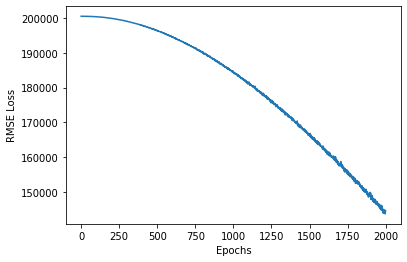

In [57]:
plt.plot(range(epochs),final_loss)
plt.xlabel("Epochs")
plt.ylabel("RMSE Loss")

In [58]:
#on test set

with torch.no_grad():
    y_pred = model(test_cat,test_cont)
    loss = torch.sqrt(loss_function(y_pred,y_test))
print("RMSE loss:{}".format(loss))

RMSE loss:140493.28125


In [65]:
Actual = pd.DataFrame(y_test.numpy(),columns=['Actual'])
Predicted = pd.DataFrame(y_pred.numpy(),columns=['Predictions'])
Final = pd.concat([Actual,Predicted],axis=1)
Final['Difference'] = Final['Actual']-Final['Predictions']
Final

,Actual,Predictions,Difference
0,130000.0,30021.998047,99978.000000
1,138887.0,46535.929688,92351.070312
2,175500.0,30670.205078,144829.796875
3,195000.0,109510.937500,85489.062500
4,142500.0,45733.476562,96766.523438
5,265900.0,58049.957031,207850.046875
6,224900.0,71618.976562,153281.031250
7,248328.0,84027.523438,164300.468750
8,170000.0,33169.804688,136830.187500
9,465000.0,134916.468750,330083.531250


In [66]:
#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')


/home/sid/.local/lib/python3.6/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type FeedForwardNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [67]:
torch.save(model.state_dict(),'HouseWeights.pt')


In [68]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)


In [69]:
model1.load_state_dict(torch.load('HouseWeights.pt'))


<All keys matched successfully>

In [70]:
model1.eval()


FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (embed_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)